Idées :  
Température, humidité, précipitations, en fonction du temps pour une station donnée  
Boxplot par mois de la température à un endroit donné  
Boxplot par station de la température  
Comparaison pour deux stations des 1ers graphes  
Placer les niveaux de précipitations sur une carte spatiale en fonction des stations  
Pair plots (pairs() en choisissant un nombre réduit de variables)  
  
Estimateurs :  
Variance empirique de la température sur une station  
Gestion des NaN  
On suppose les températures suivant une normale (graphe à l'appui)  


Test sur un paramètre :  
Vérifier l'hypothèse de normalité de la température (test de Shapiro-Wilk)  
H0 : la température moyenne à Toulouse est la même en mai et en septembre  
Test de Student  
Checker la p-value -> Conclure  

Test ANOVA :  
H0 : la température moyenne mensuelle dans toutes les stations du Sud-Ouest est la même  
On calcule la température moyenne, pour chaque mois et chaque station (nouveau df)  
On applique l'ANOVA aov() avec les colonnes qui vont bien, et on étudie la p-value -> Conclure  

Régression et étude de corrélation :  
Revoir les Pair plots, et choisir des variables qui semblent corrélées  
Régression linéaire (simple ?), étude de la robustesse (MSE, R², ...)  
Validation croisée ? (KFold) Régularisation ? (Lasso)  

In [1]:
library(dplyr)
library(ggplot2)
library(lubridate)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




In [2]:
data <- read.csv("donnees-synop-essentielles-omm.csv", sep = ";", header = TRUE)
head(data)

,ID.OMM.station,Date,Pression.au.niveau.mer,Variation.de.pression.en.3.heures,Type.de.tendance.barométrique,Direction.du.vent.moyen.10.mn,Vitesse.du.vent.moyen.10.mn,Température,Point.de.rosée,Humidité,⋯,Altitude,communes..name.,communes..code.,EPCI..name.,EPCI..code.,department..name.,department..code.,region..name.,region..code.,mois_de_l_annee
,<int>,<chr>,<int>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,⋯,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<int>
1,7181,2016-07-12T11:00:00+02:00,101410,-30,8,230,2.9,293.35,286.55,65,⋯,336,Thuilley-aux-Groseilles,54523,CC du Pays de Colombey et du Sud Toulois,245400510,Meurthe-et-Moselle,54,Grand Est,44,7
2,81405,2017-01-08T07:00:00+01:00,101140,-140,8,240,0.5,297.25,296.25,94,⋯,4,Matoury,97307,CA du Centre Littoral,249730045,Guyane,973,Guyane,3,1
3,7627,2017-01-08T13:00:00+01:00,103380,-40,8,30,2.1,277.55,269.75,57,⋯,414,Lorp-Sentaraille,09289,CC Couserans-Pyrénées,200067940,Ariège,09,Occitanie,76,1
4,78894,2017-01-09T13:00:00+01:00,101760,0,NA,100,2.3,298.15,291.35,66,⋯,44,,,,NA,,,,NA,1
5,7020,2017-01-12T13:00:00+01:00,100580,-710,8,210,11.9,282.05,280.15,88,⋯,6,La Hague,50041,CA du Cotentin,200067205,Manche,50,Normandie,28,1
6,7280,2017-12-23T13:00:00+01:00,103830,-10,0,10,2.7,280.75,278.35,85,⋯,219,Ouges,21473,Dijon Métropole,242100410,Côte-d'Or,21,Bourgogne-Franche-Comté,27,12


In [3]:
colnames(data)

[1] "ID.OMM.station"                                           
 [2] "Date"                                                     
 [3] "Pression.au.niveau.mer"                                   
 [4] "Variation.de.pression.en.3.heures"                        
 [5] "Type.de.tendance.barométrique"                            
 [6] "Direction.du.vent.moyen.10.mn"                            
 [7] "Vitesse.du.vent.moyen.10.mn"                              
 [8] "Température"                                              
 [9] "Point.de.rosée"                                           
[10] "Humidité"                                                 
[11] "Visibilité.horizontale"                                   
[12] "Temps.présent"                                            
[13] "Temps.passé.1"                                            
[14] "Temps.passé.2"                                            
[15] "Nebulosité.totale"                                        
[16] "Nébulosité..des.nuages.de.l..étage.inférieur"             
[17] "Hauteur.de.la.base.des.nuages.de.l.étage.inférieur"       
[18] "Type.des.nuages.de.l.étage.inférieur"                     
[19] "Type.des.nuages.de.l.étage.moyen"                         
[20] "Type.des.nuages.de.l.étage.supérieur"                     
[21] "Pression.station"                                         
[22] "Niveau.barométrique"                                      
[23] "Géopotentiel"                                             
[24] "Variation.de.pression.en.24.heures"                       
[25] "Température.minimale.sur.12.heures"                       
[26] "Température.minimale.sur.24.heures"                       
[27] "Température.maximale.sur.12.heures"                       
[28] "Température.maximale.sur.24.heures"                       
[29] "Température.minimale.du.sol.sur.12.heures"                
[30] "Méthode.de.mesure.Température.du.thermomètre.mouillé"     
[31] "Température.du.thermomètre.mouillé"                       
[32] "Rafale.sur.les.10.dernières.minutes"                      
[33] "Rafales.sur.une.période"                                  
[34] "Periode.de.mesure.de.la.rafale"                           
[35] "Etat.du.sol"                                              
[36] "Hauteur.totale.de.la.couche.de.neige..glace..autre.au.sol"
[37] "Hauteur.de.la.neige.fraîche"                              
[38] "Periode.de.mesure.de.la.neige.fraiche"                    
[39] "Précipitations.dans.la.dernière.heure"                    
[40] "Précipitations.dans.les.3.dernières.heures"               
[41] "Précipitations.dans.les.6.dernières.heures"               
[42] "Précipitations.dans.les.12.dernières.heures"              
[43] "Précipitations.dans.les.24.dernières.heures"              
[44] "Phénomène.spécial.1"                                      
[45] "Phénomène.spécial.2"                                      
[46] "Phénomène.spécial.3"                                      
[47] "Phénomène.spécial.4"                                      
[48] "Nébulosité.couche.nuageuse.1"                             
[49] "Type.nuage.1"                                             
[50] "Hauteur.de.base.1"                                        
[51] "Nébulosité.couche.nuageuse.2"                             
[52] "Type.nuage.2"                                             
[53] "Hauteur.de.base.2"                                        
[54] "Nébulosité.couche.nuageuse.3"                             
[55] "Type.nuage.3"                                             
[56] "Hauteur.de.base.3"                                        
[57] "Nébulosité.couche.nuageuse.4"                             
[58] "Type.nuage.4"                                             
[59] "Hauteur.de.base.4"                                        
[60] "Coordonnees"                                              
[61] "Nom"                                                      
[62] "Type.de.tendance.barométrique.

In [3]:
colnames(data) <- c("ID_Station", "Date", "Pression_mer","Variation_pression_3h","Type_tendance_barométrique",
"Direction_vent_moy_10mn","Vitesse_vent_moy_10mn","Température_K","Point_rosée","Humidité","Visibilité_horiz",
"Temps_présent","Temps_passé_1","Temps_passé_2","Nébulosité_tot","Nébulosité_inf","Hauteur_nuages_inf","Type_nuages_inf",
"Types_nuages_moy","Type_nuages_sup","Pression_station","Niveau_barométrique","Géopotentiel","Variation_pression_24h",
"Température_min_12h","Température_min_24h","Température_max_12h","Température_max_24h","Température_min_sol_12h",
"Méthode_mesure_temp_thermomètre_mouillé","Température_thermomètre_mouillé","Rafale_10mn","Rafales_période",
"Période_rafale","Etat_sol","Hauteur_couche_neige","Hauteur_neige_fraiche","Période_neige_fraiche","Précipitation_1h",
"Précipitations_3h","Précipitations_6h","Précipitations_12h","Précipitations_24h","Phénomène_spécial_1",
"Phénomène_spécial_2","Phénomène_spécial_3","Phénomène_spécial_4","Nébulosité_couche_1",
"Type_nuage_1","Hauteur_base_1","Nébulosité_couche_2","Type_nuage_2","Hauteur_base_2",
"Nébulosité_couche_3","Type_nuage_3","Hauteur_base_3","Nébulosité_couche_4","Type_nuage_4",
"Hauteur_base_4","Coordonnees","Nom","Type_tendance_baro_1","Temps_passé_1.1","Temps_présent_1",
"Température_C","Température_min_12h_C","Température_min_24h_C","Température_max_12h_C",
"Température_max_24h_C","Température_min_sol_12h_C","Latitude","Longitude","Altitude","Commune","Commune_code",
"EPCI","EPCI_code","Département","Département_code","Région","Région_code","Mois")

In [40]:
unique(data$Commune)

[1] "Thuilley-aux-Groseilles"       "Matoury"                      
 [3] "Lorp-Sentaraille"              ""                             
 [5] "La Hague"                      "Ouges"                        
 [7] "Fretin"                        "Guipavas"                     
 [9] "Saint-Georges"                 "Saint-Aignan-Grandlieu"       
[11] "Parçay-Meslay"                 "Perpignan"                    
[13] "Carpiquet"                     "Lucciana"                     
[15] "Le Lamentin"                   "Mérignac"                     
[17] "Ajaccio"                       "Athis-Mons"                   
[19] "Prunay"                        "Saint-Jacques-de-la-Lande"    
[21] "Holtzheim"                     "Sainte-Marie"                 
[23] "Abbeville"                     "Mont-de-Marsan"               
[25] "Marignane"                     "Bangor"                       
[27] "Poitiers"                      "Barberey-Saint-Sulpice"       
[29] "Mauguio"                       "Les Abymes"                   
[31] "Gourdon"                       "Cerisé"                       
[33] "Nice"                          "La Trinité"                   
[35] "Chaspuzac"                     "Embrun"                       
[37] "Maripasoula"                   "Colombier-Saugnieu"           
[39] "Millau"                        "Blagnac"                      
[41] "Saint-Laurent-du-Maroni"       "Saint-Mandrier-sur-Mer"       
[43] "Montélimar"                    "Saint-Denis-d'Oléron"         
[45] "Boos"                          "Limoges"                      
[47] "Louey"                         "Clermont-Ferrand"             
[49] "Perros-Guirec"                 "Pamandzi"                     
[51] "Blotzheim"                     "Bourges"                      
[53] "La Désirade"                   "les Éparses de l'océan Indien"
[55] "Archipel des Kerguelen"        "Saint-Barthélemy"             
[57] "Saint-Pierre"

In [4]:
data_caen <- data %>%
  filter(data$Commune == "Carpiquet")

data_toulouse <- data %>%
  filter(data$Commune == 'Blagnac')

dim(data_toulouse)

data_caen$Date <- as.Date(data_caen$Date)
data_toulouse$Date <- as.Date(data_toulouse$Date)

[1] 29426    82

In [5]:
data_caen_2024 <- filter(data_caen, Date >= "2024-01-01" & Date <= "2024-12-31")
data_toulouse_2024 <- filter(data_toulouse, Date >= "2024-01-01" & Date <= "2024-12-31")

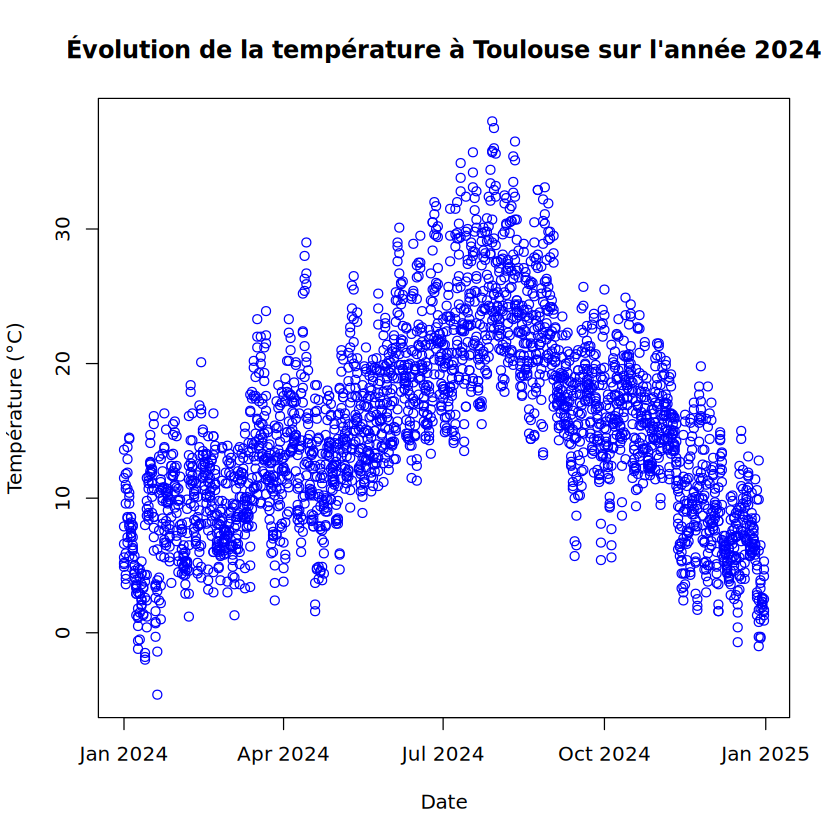

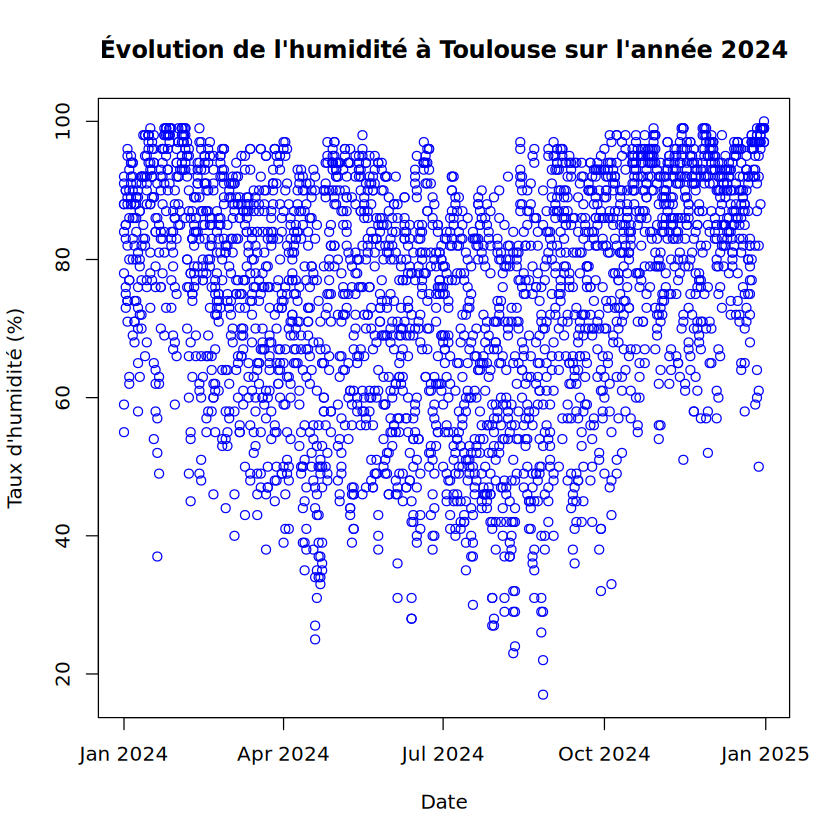

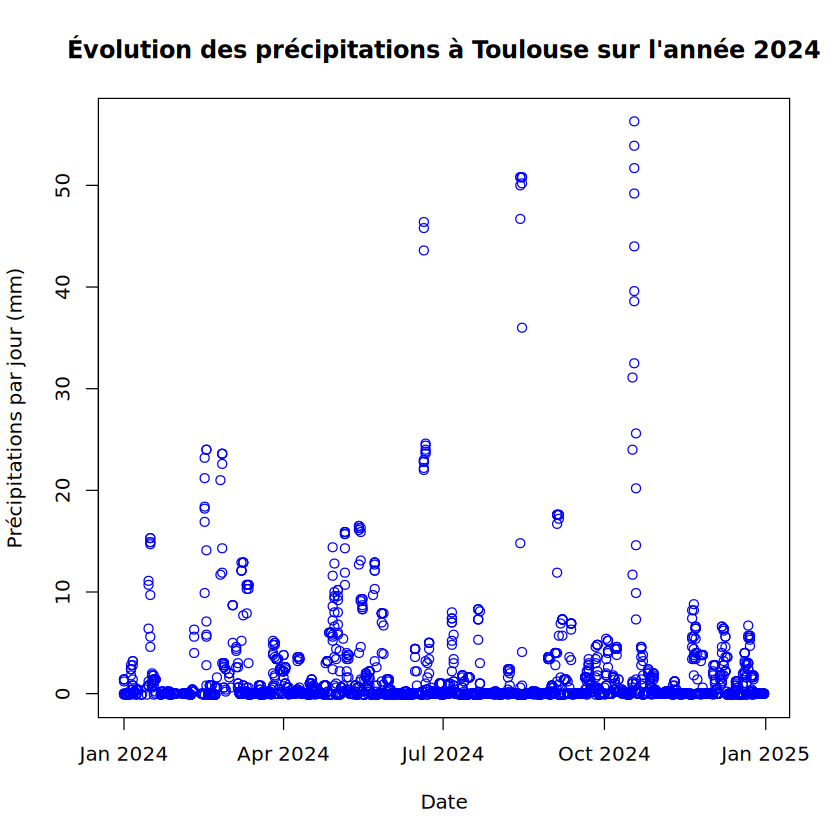

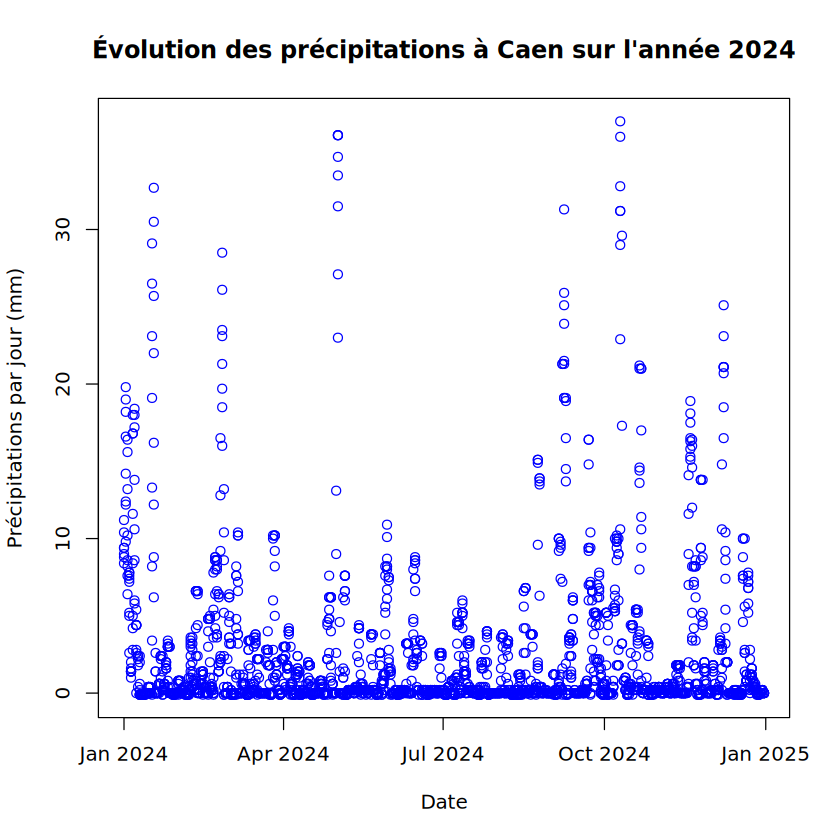

In [6]:
par(bg = "white")

plot(data_toulouse_2024$Date, data_toulouse_2024$`Température_C`, 
     type = "p",
     col = "blue",
     xlab = "Date", 
     ylab = "Température (°C)", 
     main = "Évolution de la température à Toulouse sur l'année 2024")

plot(data_toulouse_2024$Date, data_toulouse_2024$`Humidité`, 
     type = "p",
     col = "blue",
     xlab = "Date", 
     ylab = "Taux d'humidité (%)", 
     main = "Évolution de l'humidité à Toulouse sur l'année 2024")

plot(data_toulouse_2024$Date, data_toulouse_2024$`Précipitations_24h`, 
     type = "p",
     col = "blue",
     xlab = "Date", 
     ylab = "Précipitations par jour (mm)", 
     main = "Évolution des précipitations à Toulouse sur l'année 2024")

plot(data_caen_2024$Date, data_caen_2024$`Précipitations_24h`, 
     type = "p",
     col = "blue",
     xlab = "Date", 
     ylab = "Précipitations par jour (mm)", 
     main = "Évolution des précipitations à Caen sur l'année 2024")

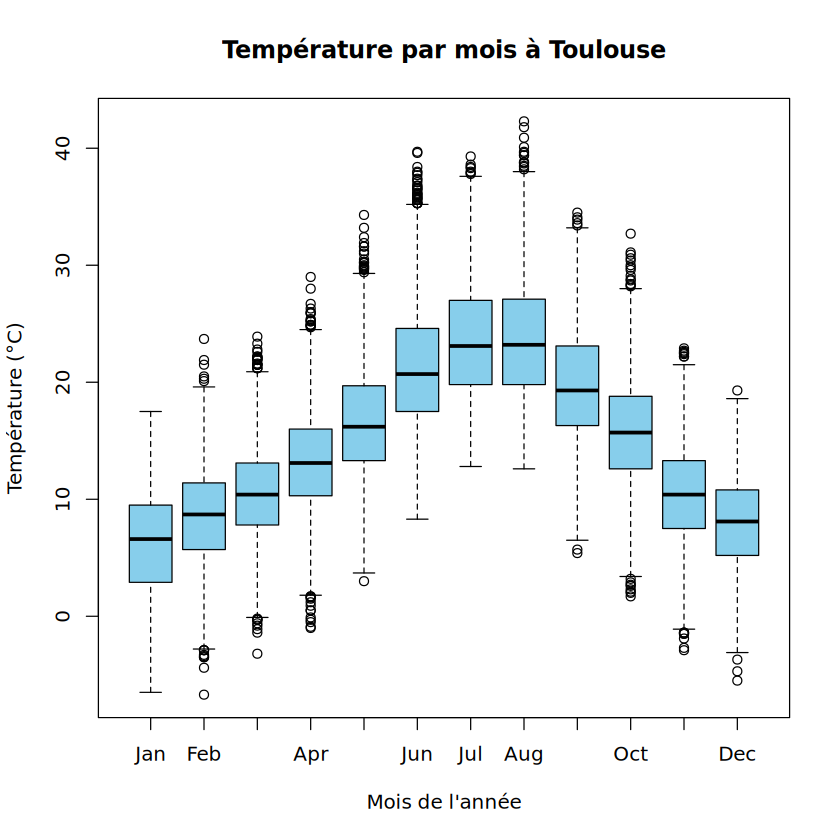

In [7]:
data_toulouse$mois <- month(data_toulouse$Date, label = TRUE, abbr = TRUE)
par(bg = "white")
boxplot(Température_C ~ mois, data = data_toulouse,col = "skyblue",
        main = "Température par mois à Toulouse",
        xlab = "Mois de l'année",       # Légende axe X
        ylab = "Température (°C)")      # Légende axe Y)

In [ ]:
pairs(data_toulouse_2024[, c("Température_C", "Humidité", "Précipitations_24h")],
      main = "Pairs plot des variables d'intérêt")

In [46]:
data_caen_mars = data_caen %>%
  filter(format(data_caen$Date, "%m") == "03")

data_caen_juillet = data_caen %>%
  filter(format(data_caen$Date, "%m") == "07")

mean(data_caen_juillet$`Température...C`, na.rm = TRUE)
mean(data_caen_mars$`Température...C`, na.rm = TRUE)
mean(data_caen$`Température...C.`, na.rm = TRUE)
mean(data_toulouse$`Température...C`, na.rm = TRUE)

[1] 18.44521

[1] 8.202632

[1] 11.91249

[1] 14.90972

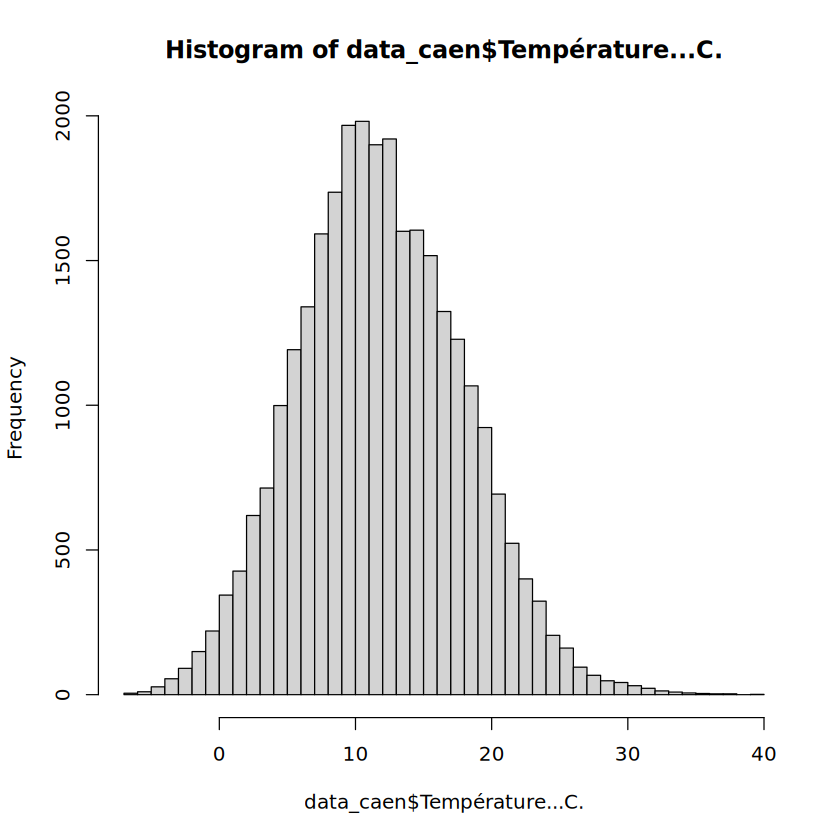

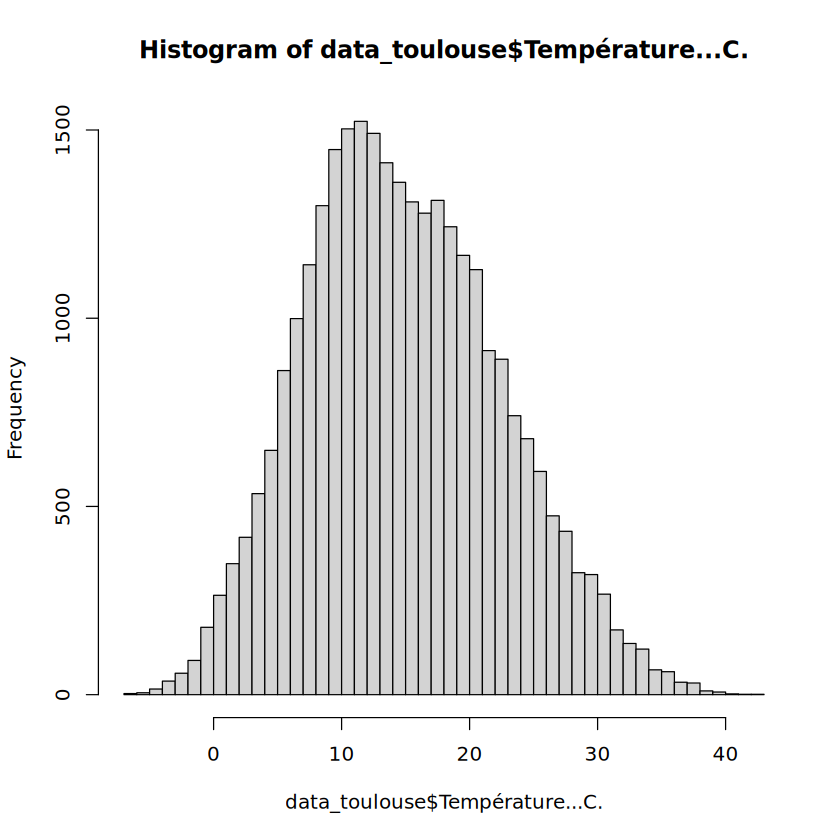

In [52]:
par(bg = "white")
hist(data_caen$`Température...C.`, breaks = 50)
hist(data_toulouse$`Température...C.`, breaks = 50)


In [ ]:
jour <- format(as.Date(data$Date), "%m-%d")
tapply(data$`Température...C.`, jour, mean, na.rm = TRUE)

01       02       03       04       05       06       07       08 
10.08627 11.14811 12.48276 14.24743 16.66247 19.63578 20.94462 20.96319 
      09       10       11       12 
18.48575 15.83133 12.66217 11.10780

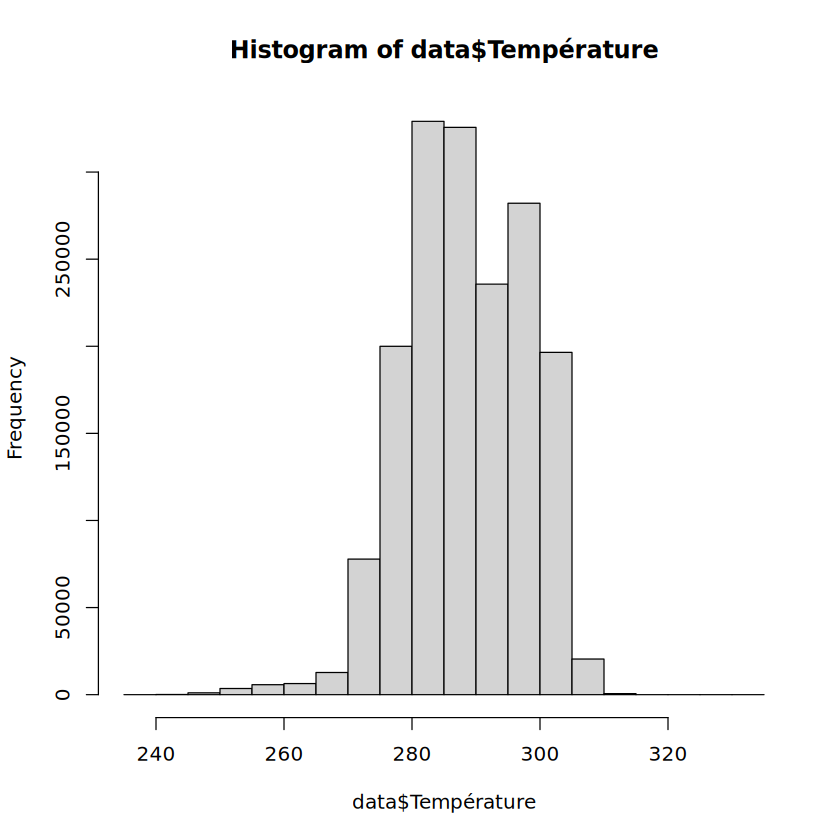

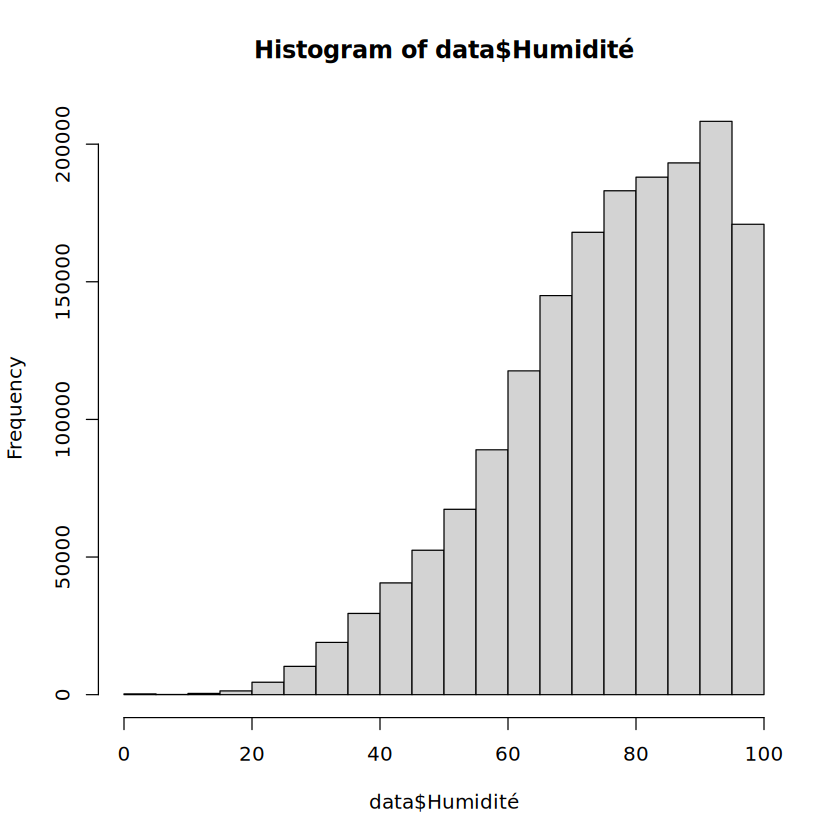

In [ ]:
par(bg = "white") # Définit le fond blanc pour le graphique
hist(data$`Température`)
hist(data$`Humidité`)

Warning message:
“Removed 6 rows containing missing values or values outside the scale range
(`geom_point()`).”


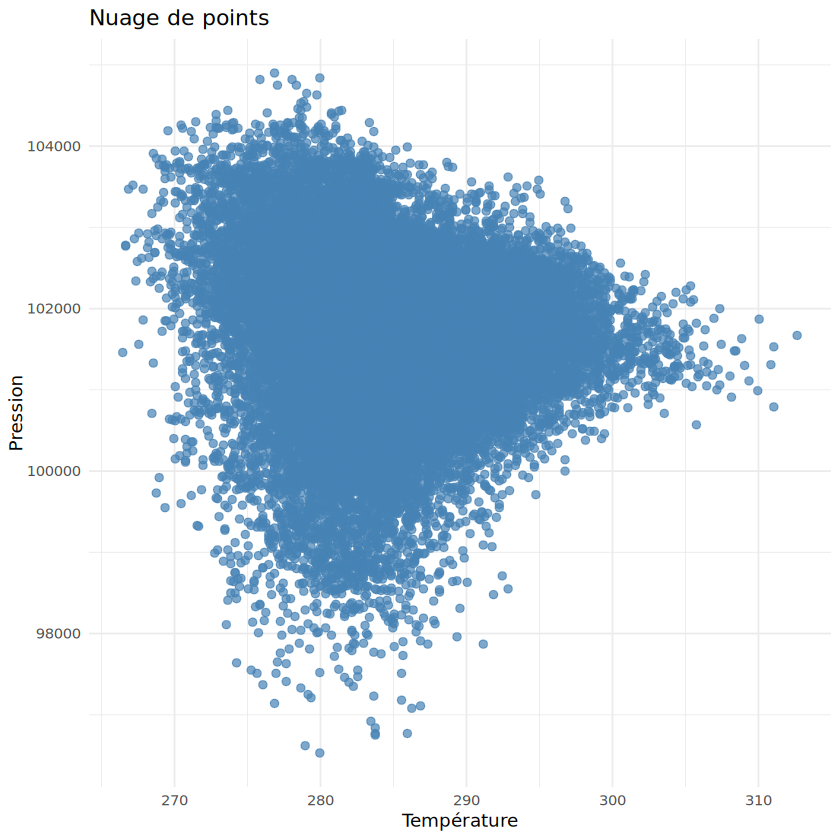

In [9]:
data_calvados <- data %>%
  filter(data$department..name. == "Calvados")

ggplot(data_calvados, aes(x = `Température`, y = Pression.au.niveau.mer)) +
  geom_point(color = "steelblue", alpha = 0.7, size = 2) +
  theme_minimal() +
  labs(x = "Température", y = "Pression", title = "Nuage de points")

In [6]:
summary(data)

 ID.OMM.station      Date           Pression.au.niveau.mer
 Min.   : 7005   Length:1719567     Min.   : 93850        
 1st Qu.: 7207   Class :character   1st Qu.:101180        
 Median : 7577   Mode  :character   Median :101600        
 Mean   :26062                      Mean   :101577        
 3rd Qu.:61976                      3rd Qu.:102090        
 Max.   :89642                      Max.   :107570        
                                    NA's   :94370         
 Variation.de.pression.en.3.heures Type.de.tendance.barométrique
 Min.   :-2840.00                  Min.   : 0.000               
 1st Qu.:  -60.00                  1st Qu.: 2.000               
 Median :   10.00                  Median : 3.000               
 Mean   :   15.39                  Mean   : 4.297               
 3rd Qu.:   90.00                  3rd Qu.: 7.000               
 Max.   : 2990.00                  Max.   :10.000               
 NA's   :40694                     NA's   :68236                
 Directi

In [7]:
dim(data)

[1] 1719567      82

In [8]:
data[which.min(data$Altitude), ]

,ID.OMM.station,Date,Pression.au.niveau.mer,Variation.de.pression.en.3.heures,Type.de.tendance.barométrique,Direction.du.vent.moyen.10.mn,Vitesse.du.vent.moyen.10.mn,Température,Point.de.rosée,Humidité,⋯,Altitude,communes..name.,communes..code.,EPCI..name.,EPCI..code.,department..name.,department..code.,region..name.,region..code.,mois_de_l_annee
,<int>,<chr>,<int>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,⋯,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<int>
33,7643,2017-01-27T16:00:00+01:00,101680,-170,6,120,12.3,285.25,280.35,72,⋯,2,Mauguio,34154,CA du Pays de l'Or,243400470,Hérault,34,Occitanie,76,1


In [9]:
max(data$Date)
min(data$Date)

[1] "2025-09-03T23:00:00+02:00"

[1] "2015-08-04T02:00:00+02:00"

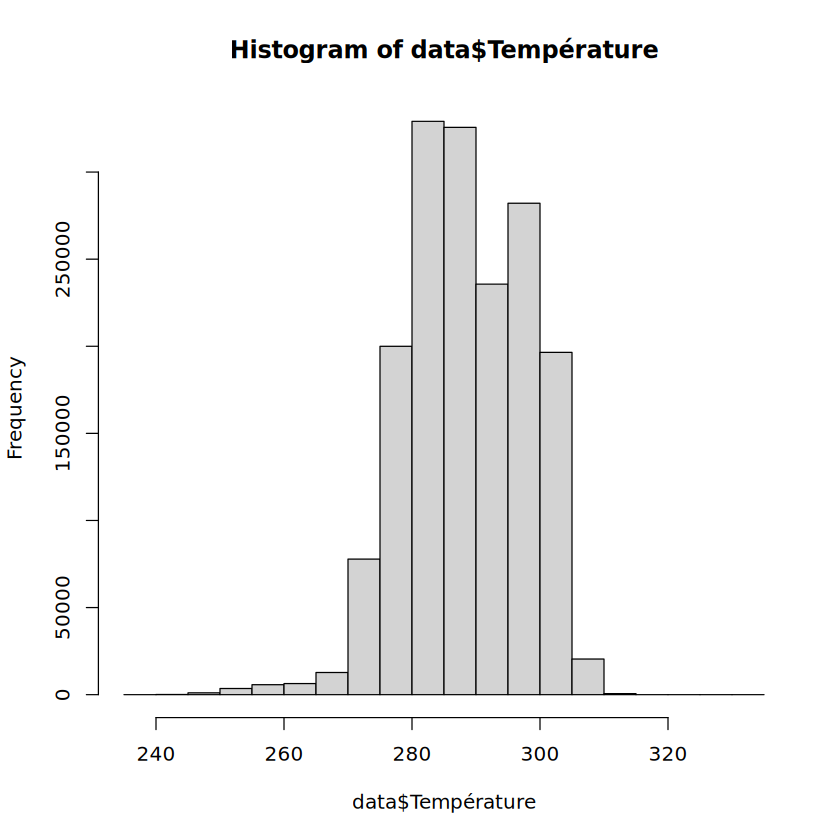

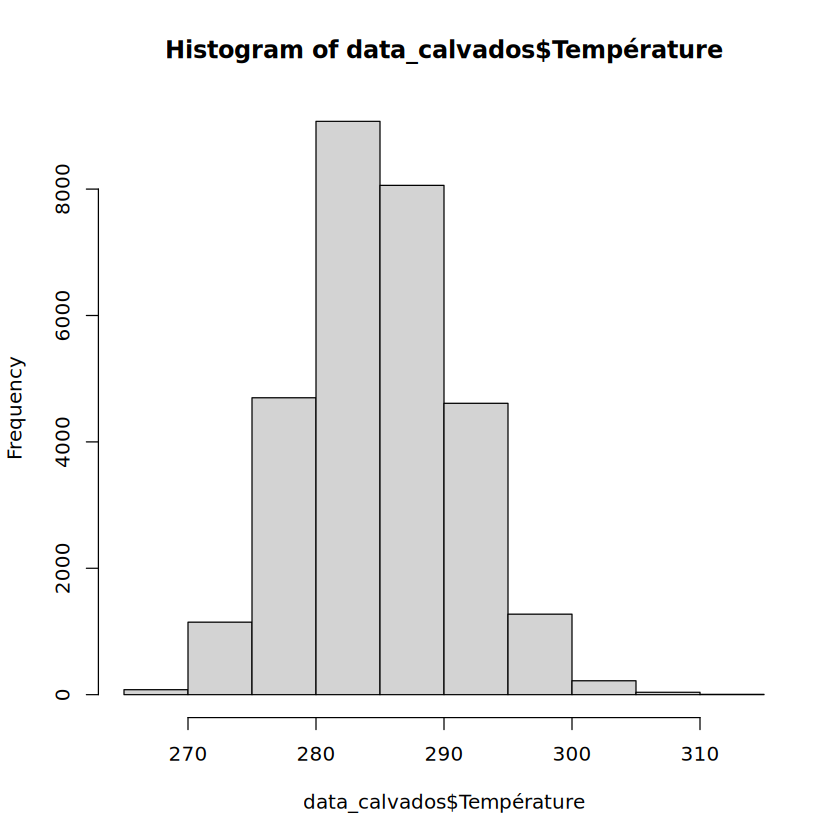

In [10]:
data_calvados <- data %>%
  filter(data$department..name. == "Calvados")
  
par(bg = "white") # Définit le fond blanc pour le graphique
hist(data$`Température`)
hist(data_calvados$`Température`)

Warning message:
“Removed 22176 rows containing non-finite outside the scale range
(`stat_ydensity()`).”
Warning message:
“Removed 22176 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


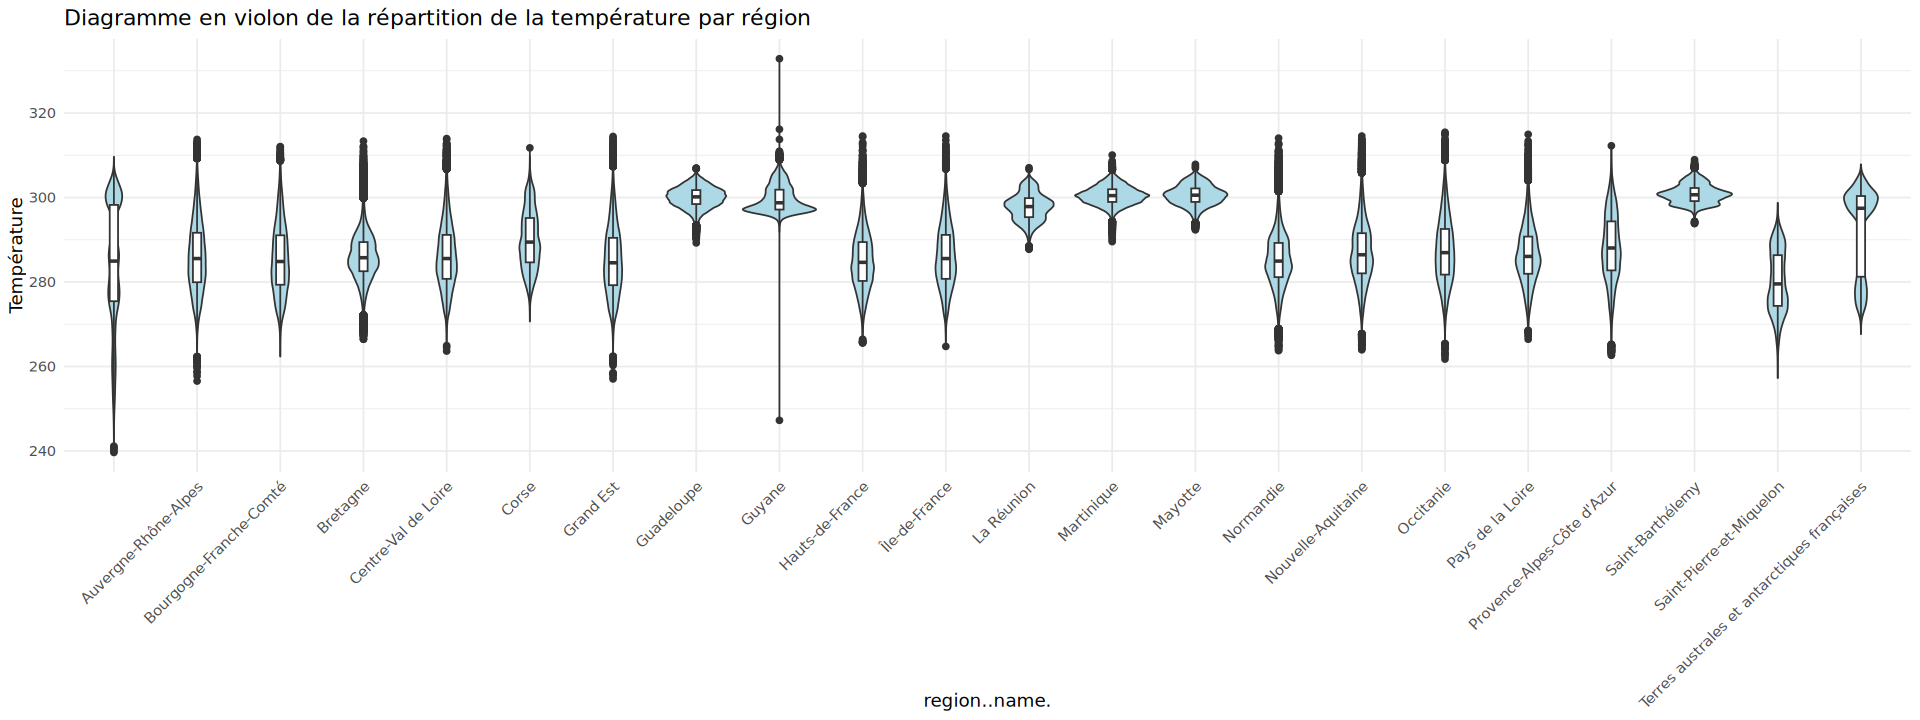

In [11]:
options(repr.plot.width = 16, repr.plot.height = 6)

ggplot(data, aes(x = region..name., y = `Température`)) +
  geom_violin(trim = TRUE, fill = "lightblue") +
  geom_boxplot(width = 0.1, fill = "white") +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  labs(title = "Diagramme en violon de la répartition de la température par région")

On remarque que les régions d'Outre-Mer présentent (à part Saint-Pierre et Miquelon et les Terres australes et antarctiques) des valeurs de température bien plus élevées que les autres régions. On peut penser que ce sera également le cas pour les autres variables de ce jeu de données (en tout cas elles seront différentes), et ce sera à prendre en compte dans notre étude